# SNA Group Project

## Members: Andrea Magri, Federico De Marinis, Riccardo Milano

## Graph: Forrest Gump 

Before starting with the code of the project itself, it is important to make a small introdution about the graph we have chosen to work on. The graph, is undirected and weighted and represents the movie Forrest Gump. Each node represents a character in the movie and links between nodes indicate that the two characters appeared in the same scene. The weight of each link indicates how many scenes the two characters appeared in together. 

To start, we simply import some helpful libraries.

In [6]:
import random
import networkx as nx
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import csv

# Week 1

The first thing we have to do, is storing the inforation about the links between the nodes in the graph. This small piece of code, reads in a file called 'edges.txt' and processes its contents to create the edges' list. It then processes each element in the list by removing the newline character and splitting the string at each comma, converts each element in the sublists to an integer and it eventually creates a new list of sublists, where each sublist contains the first two elements of the original sublist and a dictionary containing the fifth element of the original sublist as the value for the key 'weight'.

In [7]:
with open('C:/Users/feder/OneDrive/Federico/Università/2° anno/1° semestre/Social Netwrok Analysis/project/b) Forest_Gump/edges.txt') as file:
    lines = file.readlines()
    edge_list = [i.replace('\n', '') for i in lines]
    edge_list = [i.split(',') for i in edge_list]
    edge_list = [[int(j) for j in i] for i in edge_list]
    edge_list = [[i[0],i[1],{'weight':i[4]}] for i in edge_list]
    
print(edge_list)

[[0, 41, {'weight': 1}], [0, 73, {'weight': 1}], [0, 35, {'weight': 1}], [0, 39, {'weight': 1}], [0, 40, {'weight': 1}], [0, 88, {'weight': 1}], [1, 35, {'weight': 1}], [2, 35, {'weight': 3}], [2, 48, {'weight': 1}], [2, 57, {'weight': 1}], [2, 62, {'weight': 1}], [2, 74, {'weight': 1}], [3, 35, {'weight': 2}], [3, 41, {'weight': 1}], [3, 48, {'weight': 1}], [3, 84, {'weight': 1}], [4, 15, {'weight': 1}], [4, 65, {'weight': 1}], [4, 85, {'weight': 1}], [4, 27, {'weight': 1}], [4, 35, {'weight': 1}], [5, 34, {'weight': 1}], [5, 35, {'weight': 1}], [5, 20, {'weight': 1}], [6, 33, {'weight': 1}], [6, 36, {'weight': 1}], [6, 35, {'weight': 1}], [6, 41, {'weight': 1}], [6, 46, {'weight': 1}], [6, 49, {'weight': 1}], [7, 9, {'weight': 1}], [7, 35, {'weight': 1}], [7, 41, {'weight': 1}], [7, 90, {'weight': 1}], [8, 35, {'weight': 1}], [8, 41, {'weight': 1}], [8, 58, {'weight': 1}], [8, 80, {'weight': 1}], [8, 89, {'weight': 1}], [9, 41, {'weight': 1}], [9, 90, {'weight': 1}], [9, 35, {'weight

We create the graph using the NetworkX library and we store it in the "G" variable.

In [8]:
G = nx.from_edgelist(edge_list)

We print two different visualization of the graph and we might be able to identify interesting aspect about nodes and links.

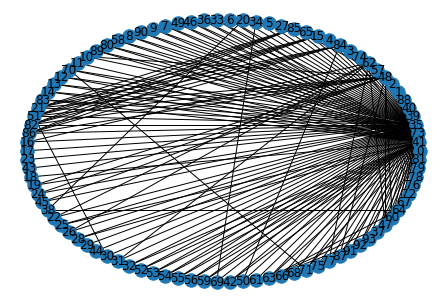

In [9]:
# Circular Graph Visualization
nx.draw_circular(G,with_labels=True, node_size = 180)

NetworkXError: random_state_index is incorrect

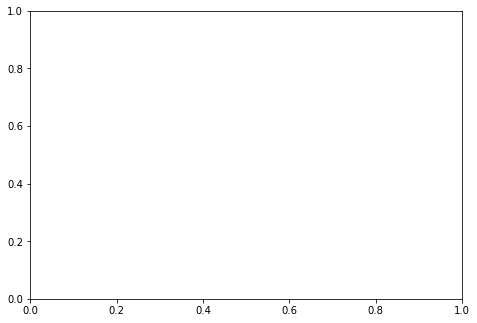

In [10]:
# does not work
nx.draw(G, with_labels=True)

By looking at out otputs, we are lead to the assumption that the node 35 is the most connected node. To be sure about it, we wirte a small line of code that assings to a variable the most connected node. The list of tuples is passed to the sorted() function, which sorts the list in ascending order according to the second element of each tuple (the degree of each node). The key parameter specifies that the sorting should be based on the second element of each tuple, and the reverse parameter specifies that the list should be sorted in descending order. The first element of the sorted list is then selected using list indexing [0][0].

In [ ]:
# find the most connected node 
most_connected_node = sorted(G.degree(), key=lambda x: x[1], reverse=True)[0][0] 
 
# print the most connected node 
print("The most connected node is", most_connected_node)

To have more information about the graph, we find the precise number of nodes and edges and together we calculate the graph's density and the avarage degree of its nodes.

In [ ]:
L = G.number_of_edges()
print(f'    The number of Edges is: {L}\n')

N = G.number_of_nodes()
print(f'    The number of Nodes is: {N}\n')

average_degree = round(2*L / N,2)
print(f'    The Average Degree: {average_degree}\n')

density = round(average_degree / (N - 1),2)
print(f'    The Density of the graph is: {density}\n')

We plot the the adjacency matrix that we will later use while calculating the avarage clustering.

In [ ]:
adjacency_matrix = nx.adjacency_matrix(G)
print(adjacency_matrix)

# Week 2

For this week, we should consider the largest connected component and for us, this means working on the whole graph.
We start by computing with the networkx libraries the Average Distance and Diameter.

In [ ]:
Diameter = nx.diameter(G)
print(f'Diameter: {Diameter}')

Average_Distance = nx.average_shortest_path_length(G)
x = round(Average_Distance, 4)
print(f'Average Distance: {x}')

Together, we decide to compute the Average Clustering. We first define a function to compute for each node the clustering coefficient and then we avarage it.

In [11]:
def clustering(G,i): 
    k=G.degree[i]
  
    if k==0 or k==1: 
        Result=0
    else:
        A=nx.adjacency_matrix(G)
        A3=A**3
        triangle=A3[i,i]/2
        den=k*(k-1)/2 
        Result=triangle/den 
    return Result
print(clustering(G,0))

2.066666666666667


We can clearly see that this function does not work since our graph is wheighted.

Indeed, if we try to compute average clustering by averaging the previous result we will get a number way greater than 1

In [12]:
def average_clustering(G): 
    N=G.number_of_nodes() 
    Temp_sum=0 
    for i in range(N):
        Temp_sum=Temp_sum+clustering(G,i)
        Result=Temp_sum/N
    return Result

print(average_clustering(G))

19.39793763198773


The average clustering is clearly not 19.397... so we will just use the networkx function for computing the average clustering.

In [13]:
print('The Average Clustering is' , nx.average_clustering(G))

The Average Clustering is 0.8002425574908809


Let's print a fancy visualization for the clustering.

In [14]:
print("node degree clustering")
cNet = []
for v in nx.nodes(G):
    cNet.append(nx.clustering(G, v))
    print(f"{v} {nx.degree(G, v)} {nx.clustering(G, v)}") # Nice printing : node number, degree and clustering

node degree clustering
0 6 1.0
41 45 0.1101010101010101
73 6 1.0
35 89 0.04468845760980592
39 6 1.0
40 6 1.0
88 6 1.0
1 1 0
2 5 0.4
48 19 0.29239766081871343
57 2 1.0
62 8 0.25
74 2 1.0
3 4 0.8333333333333334
84 10 0.6888888888888889
4 5 1.0
15 11 0.6727272727272727
65 5 1.0
85 11 0.6727272727272727
27 5 1.0
5 3 1.0
34 4 0.6666666666666666
20 4 0.5
6 6 1.0
33 6 1.0
36 6 1.0
46 6 1.0
49 6 1.0
7 4 1.0
9 4 1.0
90 4 1.0
8 5 1.0
58 5 1.0
80 5 1.0
89 5 1.0
10 2 1.0
11 2 1.0
70 4 0.6666666666666666
12 5 1.0
13 5 1.0
14 5 1.0
83 5 1.0
21 8 1.0
51 9 0.8055555555555556
82 8 1.0
86 8 1.0
16 2 1.0
17 3 1.0
23 3 1.0
43 3 1.0
18 1 0
19 4 1.0
24 4 1.0
45 4 1.0
38 2 0
22 2 1.0
25 2 1.0
26 2 1.0
28 2 1.0
29 2 1.0
44 2 1.0
30 2 1.0
31 2 1.0
32 8 1.0
52 8 1.0
53 8 1.0
54 8 1.0
55 8 1.0
56 8 1.0
59 8 1.0
69 2 1.0
42 2 1.0
50 2 1.0
61 1 0
63 5 0.6
66 1 0
68 1 0
71 3 1.0
75 1 0
77 2 1.0
87 5 1.0
91 1 0
92 2 1.0
93 2 1.0
37 2 1.0
47 7 0.6190476190476191
60 5 1.0
64 5 0.4
67 2 1.0
72 1 0
76 2 1.0
78 2 1.0
79 

Let's now compute transitivity number. Why is it important? It is important because it can be used to make predictions about future behavior or events. We can say that it is a measure of the degree to which nodes in a graph tend to cluster together.
We first compute it with our function and then see if the result matches with the result that we obtain if calculating it with the networkx built in function.

In [15]:
def transitivity(G):
    triangles = nx.triangles(G, nodes=None)
    n_triangles = 0
    for j in triangles:
        n_triangles += triangles[j]
        
    
    sum_k = 0
    for i in G.nodes:
        k = G.degree[i]
        sum_k += (k*(k-1))/2
        
    Result = (n_triangles) / sum_k
    xtransitivity = nx.transitivity(G)
    if Result == xtransitivity:
        return f'The transitivity number calculated is {Result} and the two transitivity numbers match.' 
    else:
        return f'The transitivity number calculated is {Result} but the two transitivity numbers do not match.' 

print(transitivity(G))

The transitivity number calculated is 0.1918081918081918 and the two transitivity numbers match.


Note on our transitivity function: in the usual formula we should multiply the number of triangles by 3, but in this case 3 is not necessary since we already counted the number of triangles for each node, so we avoid to repeat the same triangle more than once.

# Week 3

For this third week, we are asked to compute a centrality measure among the ones that we have seen in our lectures. 

The measure we will now calculate, is the centrality measure. This mesure should now confirm us that the most connected node is Forrest's node, 35. Closeness centrality is a measure of how quickly information can spread through a network from a given node and it can be also useful for detecting nodes that can act as bridges between different parts of the graph since they have a low number of steps to do in order to reach a variety of other nodes. So, it is a measure of how "close" a node is to all other nodes in the network and it is calculated taking into account the minimum number of steps (shortest path) it takes for a node to reach all other nodes in the network.

In [16]:
# Calculate shortest path lengths between all pairs of nodes
shortest_paths = nx.all_pairs_shortest_path_length(G)

# We alculate closeness centrality for each node and we sotre the information into a dictionary
closeness_centrality = {}

for node, path_lengths in shortest_paths:
    sum_lengths = sum(path_lengths.values())
    num_nodes = len(G.nodes()) - 1  # We need to subtract one to exclude the current node
    closeness_centrality[node] = num_nodes / sum_lengths

print(closeness_centrality)

{0: 0.510989010989011, 41: 0.6595744680851063, 73: 0.510989010989011, 35: 0.9587628865979382, 39: 0.510989010989011, 40: 0.510989010989011, 88: 0.510989010989011, 1: 0.49206349206349204, 2: 0.5054347826086957, 48: 0.5535714285714286, 57: 0.36186770428015563, 62: 0.5138121546961326, 74: 0.49732620320855614, 3: 0.5081967213114754, 84: 0.5195530726256983, 4: 0.5027027027027027, 15: 0.5224719101123596, 65: 0.5027027027027027, 85: 0.5224719101123596, 27: 0.5027027027027027, 5: 0.5, 34: 0.5027027027027027, 20: 0.5027027027027027, 6: 0.510989010989011, 33: 0.510989010989011, 36: 0.510989010989011, 46: 0.510989010989011, 49: 0.510989010989011, 7: 0.5054347826086957, 9: 0.5054347826086957, 90: 0.5054347826086957, 8: 0.5081967213114754, 58: 0.5081967213114754, 80: 0.5081967213114754, 89: 0.5081967213114754, 10: 0.49732620320855614, 11: 0.40086206896551724, 70: 0.5054347826086957, 12: 0.5081967213114754, 13: 0.5081967213114754, 14: 0.5081967213114754, 83: 0.5081967213114754, 21: 0.513812154696132

We now write a line of code that immediatey show us which is the node with the highest closeness centrality measure.

In [17]:
highest_cc_node = max(closeness_centrality, key=closeness_centrality.get)
print(f"The node with the highest closeness centrality is {highest_cc_node} with a value of {closeness_centrality[highest_cc_node]}")

The node with the highest closeness centrality is 35 with a value of 0.9587628865979382


...and this confirms us that Forrest is the most connected node.

Before plotting the comulative distribution of the centrality measure we calclated, we want to make an assumption. Since our graph deals with actors in a film, there should be some characters that are way more important than just extras. This means that there should be in the plot a decreasing trend of the centrality measure.

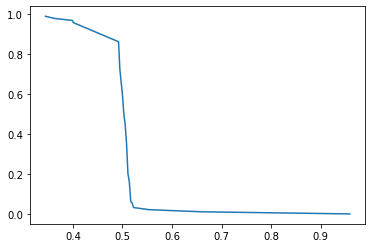

In [18]:
num_nodes = G.number_of_nodes()
rf = {} #Initialize a dictionary that will map relative frequencies for each value of the closeness centrality

for i in range(0,num_nodes):
    if closeness_centrality[i] in rf.keys():
        rf[closeness_centrality[i]] += 1
    else:
        rf[closeness_centrality[i]] = 1                

#Plot the graph 

keylist = sorted(rf.keys())


x_plot = []
y_plot = []

r_count = 0

for i in keylist:              
    x_plot.append(i)
    r_count+=rf[i]
    y_plot.append(1 - (r_count/num_nodes))

fig, ax = plt.subplots()

#Plot our centralities
plt.plot(x_plot, y_plot) 

This plot confirms our assumption, it has a reverse-s shape that is decresing as espected

# Week 5


For this week, we are asked to calculate the page rank of our graph and then make a plot about it. Page rank is an important metric in graph theory because it helps determine the importance of a node in a graph: it is indeed useful to measure the influence of a node in a network, in terms of how many other nodes it is connected to, and how important those other nodes are. So it can be used to identify influential nodes, as well as communities or hierarchies of nodes within a graph.
We will see that the node with highest Page Rank corresponds, once again, to the main character of the film, Forrest Gump.

In [19]:
def Pagerank(G, alfa, c=0):
    rt={}
    ra={c:[]}
    for i in G.nodes():
        rank=1/(len(G.nodes))
        rt[i]=rank
        ra[c].append(rank)
    check=False
    while check==False:
        c=c+1
        for i in G.nodes():
            rank=round (alfa/(len(G.nodes))+(1-alfa)*sum([(rt[i]/G.degree(i)) for i in G.neighbors(i)]),10)
            rt[i]=rank
            ra[c]=[]
            ra[c].append(rank)
            
        if ra[c]==ra[c-1]:
            check=True
    
       
    #c = iteration number at which PR converges
    conv_n = c
    return rt
    
PR_1 = Pagerank(G,0.15)
print(PR_1)

{0: 0.010422654, 41: 0.0733102988, 73: 0.010422654, 35: 0.1608270288, 39: 0.0104226539, 40: 0.0104226538, 88: 0.0104226538, 1: 0.0031317332, 2: 0.010379958, 48: 0.0305514012, 57: 0.0047271108, 62: 0.0168610901, 74: 0.004896326, 3: 0.0072336034, 84: 0.0158864339, 4: 0.0087089624, 15: 0.0169282359, 65: 0.0087089623, 85: 0.0169282358, 27: 0.0087089623, 5: 0.0071151545, 34: 0.0093229532, 20: 0.0094225588, 6: 0.0104226539, 33: 0.0104226539, 36: 0.0104226538, 46: 0.0104226538, 49: 0.0104226538, 7: 0.0078547536, 9: 0.0078547535, 90: 0.0078547535, 8: 0.0092173129, 58: 0.0092173129, 80: 0.0092173128, 89: 0.0092173128, 10: 0.0044985064, 11: 0.0047472934, 70: 0.0083143461, 12: 0.0092173129, 13: 0.0092173129, 14: 0.0092173128, 83: 0.0092173128, 21: 0.0124698358, 51: 0.0143466402, 82: 0.0124698357, 86: 0.0124698357, 16: 0.004923224, 17: 0.0072270766, 23: 0.0072270766, 43: 0.0072270766, 18: 0.0029804948, 19: 0.0078234894, 24: 0.0078234894, 45: 0.0078234894, 38: 0.0053970296, 22: 0.004923224, 25: 0.0

Let's find out which is the node with the max Page Rank (pretty intuitive which is going to be)

In [20]:
max_value = 0
for key in PR_1.keys():
    if PR_1[key] > max_value:
        max_value = PR_1[key]
        node = key
print('The node with the maximum PageRank value is: ' + str(node))
print('With value:' + str(max_value))

The node with the maximum PageRank value is: 35
With value:0.1608270288


We need to compare our result with the built in function from networkx.

In [21]:
PG_nx = nx.pagerank(G, alpha=0.85)
print(PG_nx)

{0: 0.008772656148980772, 41: 0.08055313864296963, 73: 0.008772656148980772, 35: 0.20263875726478417, 39: 0.008772656148980772, 40: 0.008772656148980772, 88: 0.008772656148980772, 1: 0.0027142411061206184, 2: 0.010423391123278355, 48: 0.038558345109090675, 57: 0.003854483411540165, 62: 0.02434207420499578, 74: 0.0039799091126828615, 3: 0.006963039271549744, 84: 0.013594724716672873, 4: 0.007070048128441998, 15: 0.02086861553108435, 65: 0.007070048128441998, 85: 0.020481948341704054, 27: 0.007070048128441999, 5: 0.005775058449136493, 34: 0.009988498598098985, 20: 0.007742973032005624, 6: 0.00877265614898077, 33: 0.00877265614898077, 36: 0.00877265614898077, 46: 0.00877265614898077, 49: 0.00877265614898077, 7: 0.0064838298416378835, 9: 0.007675350757374083, 90: 0.006483829841637884, 8: 0.007575510016825712, 58: 0.007575510016825712, 80: 0.007575510016825713, 89: 0.00987020039112472, 10: 0.003707311830247476, 11: 0.004055919633318584, 70: 0.008077951955180006, 12: 0.01068733227377383, 13:

We now try to calculate again the page rank, but this time using alpha equal to 0.85.

In [22]:
PR_2 = Pagerank(G,0.85)
print(PR_2)

{0: 0.0102394172, 41: 0.0249450417, 73: 0.0102394172, 35: 0.053264812, 39: 0.0102394172, 40: 0.0102394172, 88: 0.0102394172, 1: 0.0091323253, 2: 0.0109150132, 48: 0.0144835642, 57: 0.0094843475, 62: 0.0132018522, 74: 0.0094597757, 3: 0.0095003609, 84: 0.0113694341, 4: 0.0100412499, 15: 0.0112364848, 65: 0.0100412499, 85: 0.0112364848, 27: 0.0100412499, 5: 0.0099390865, 34: 0.0107481392, 20: 0.0107654926, 6: 0.0102394172, 33: 0.0102394172, 36: 0.0102394172, 46: 0.0102394172, 49: 0.0102394172, 7: 0.0099626762, 9: 0.0099626762, 90: 0.0099626762, 8: 0.0101268961, 58: 0.0101268961, 80: 0.0101268961, 89: 0.0101268961, 10: 0.0092466693, 11: 0.0095160585, 70: 0.0104094714, 12: 0.0101268961, 13: 0.0101268961, 14: 0.0101268961, 83: 0.0101268961, 21: 0.0102930033, 51: 0.0110013179, 82: 0.0102930033, 86: 0.0102930033, 16: 0.0093798601, 17: 0.0101470282, 23: 0.0101470282, 43: 0.0101470282, 18: 0.0091257033, 19: 0.0099963992, 24: 0.0099963992, 45: 0.0099963992, 38: 0.0097754365, 22: 0.0093798601, 25

..and finally, it is time for the graph and the cumulative distribution.

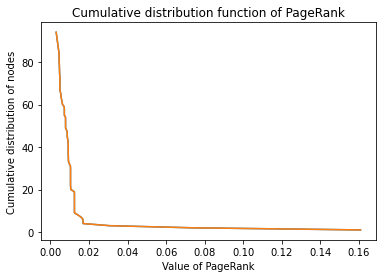

In [23]:
#Cumulative Distribution of Page Rank
centrality_lists = []
for value in PR_1.values():
    centrality_lists.append(value)

cdf_x=[] 
cdf_y=[] 
centrality_lists_copy=centrality_lists.copy() 
N=len(centrality_lists_copy)
N_temp=N 
while centrality_lists_copy:
    current_min=min(centrality_lists_copy) 
    current_num=centrality_lists_copy.count(current_min) 
    cdf_x.append(current_min) 
    cdf_y.append(N_temp) 
    N_temp=N_temp-current_num 
    for n in range(current_num): 
        centrality_lists_copy.remove(current_min)
        

fig, ax = plt.subplots()

plt.plot(cdf_x, cdf_y)
ax.set_xlabel('Value of PageRank')
ax.set_ylabel('Cumulative distribution of nodes')
plt.title("Cumulative distribution function of PageRank")
plt.plot(cdf_x,cdf_y)

# Week 6

In this week, we have to work on the largest connected component, that is for our case once again the entire graph and consider it as undirected and unweighted.
Before starting with the graph, we check that our graph is connected:

In [24]:
nx.is_connected(G)

True

...and we remove the self loops, even if there should not be any: the presence of a self loop in our graph would represent an actor making a scene with itself... but this is obvoius and at the same it does not make much sense.

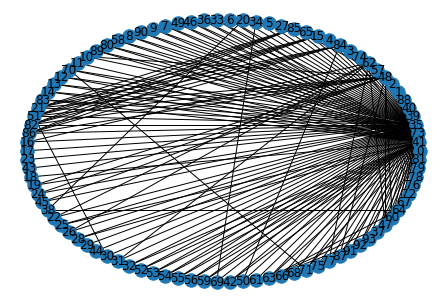

In [25]:
# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))
# Plot the resulting graph
nx.draw_circular(G, with_labels = True, node_size = 180)

Before starting with the techniques for community detection, we import a library.

In [26]:
#Time library import
import time 

...and now we start with the tecniques for community detenction.

### Bridge Removal

Bridge removal is a community detection method used to detect the different structures of a network by removing the "bridges" or connections that link different communities together. In this method, the network is divided into different subnetworks, each representing a distinct community, by removing the connections or bridges that link the different subnetworks. This method can be used to analyze the structure of a network and identify the different communities within it.

In [27]:
initial_time_br = time.time()
br_com = nx.community.girvan_newman(G)
# Compute the modularity of each partition
max_modularity=0

for com in br_com:
    mod = nx.community.quality.modularity(G, com) 
    if max_modularity == 0 or max_modularity <= mod:
        max_modularity = mod
        h_partition = com
bridge_rem = [list(c) for c in h_partition]

n_br = len(bridge_rem)
print(f"There are {len(bridge_rem)} communities detected using Bridge Removal")
final_time_br = time.time() #end the counter

clusters_br = {}
n = 1
for i in bridge_rem:
    clusters_br[n] = i
    n += 1
print(clusters_br)

NetworkXError: random_state_index is incorrect

### Modularity Optimization

Modularity Optimization is a graph clustering technique that assigns nodes to clusters in such a way that the intra-cluster edges are maximized while the inter-cluster edges are minimized. So, The goal of modularity optimization is to find a partition of the network into communities such that the number of edges within communities is maximized, relative to the number of edges between communities. To find the optimal partition, the algorithm starts with an initial partition of the network and then iteratively moves nodes between communities in order to maximize the modularity score. The modularity score is a measure of how well the current partition of the network into communities fits the network structure and it is calculated as the sum of the fraction of edges within communities minus the expected fraction of edges within communities, for all communities in the partition.

In [28]:
initial_time_mod_opt = time.time() #start the counter

mod_opt = nx.community.greedy_modularity_communities(G)
nmod_opt = len(mod_opt)      
final_time_mod_opt = time.time() #start the counter

part_mod_opt = [list(c) for c in mod_opt]

print(f"There are {len(mod_opt)} communities detected using Modularity Optimization")
clusters_mod_opt = {}
n = 1
for i in part_mod_opt:
      clusters_mod_opt[n] = i
      n += 1
print(clusters_mod_opt)


There are 5 communities detected using Modularity Optimization
{1: [1, 5, 16, 17, 20, 22, 23, 26, 29, 31, 34, 35, 38, 43, 44, 47, 60, 61, 62, 63, 64, 66, 67, 68, 69, 72, 75, 76, 77, 78, 79, 81, 87, 91, 93], 2: [0, 7, 8, 9, 11, 12, 13, 14, 18, 25, 28, 37, 39, 40, 41, 42, 58, 70, 71, 73, 80, 83, 88, 89, 90, 92], 3: [2, 3, 4, 10, 15, 19, 21, 24, 27, 30, 45, 48, 50, 51, 57, 65, 74, 82, 84, 85, 86], 4: [32, 52, 53, 54, 55, 56, 59], 5: [33, 36, 6, 46, 49]}


### Label Propagation

The basic idea of label propagation is that each node in the network is initially assigned a label, which is typically the node's own identifier. The labels are then propagated through the network in order to find groups of nodes with similar labels.

In [29]:
initial_time_lp = time.time()#start the counter 
lpcom = nx.community.asyn_lpa_communities(G)
partition_lp = [list(c) for c in lpcom]
nlp = len(partition_lp)

print(f"There are {len(partition_lp)} communities detected using Label Propagation")

final_time_lp = time.time()

clusterslp = {}
n = 1
for i in partition_lp:
    clusterslp[n] = i
    n+=1
print(clusterslp)

NetworkXError: random_state_index is incorrect

Let us show once again the number of detected communities using the three different method.

In [30]:
def nclusters(partition):
    nclusters = len(partition)
    print(f'The number of partitions detected is: {nclusters}')
    return nclusters

nclusterbr = nclusters(clusters_br.values())
nclustermodopt = nclusters(clusters_mod_opt.values())
nclusterslp = nclusters(clusterslp.values())

print()

NameError: name 'clusters_br' is not defined

The communities detected using Bridge Removal, Modularity Optimization and Label Propagation were respectively 37, 5 and 7. We clearly see that the number of detected community for each method is different. But this is quite obvious, since each method has different assumptions and criteria for what constitutes a community and might be sensitive to different aspects of the network structure such as the degree or the shortest path for instance.

# Time Consumptions

We can easily calculate the time consumption for each technique used:

In [31]:
time_br = final_time_br - initial_time_br
time_mod_opt = final_time_mod_opt - initial_time_mod_opt
time_lp = final_time_lp - initial_time_lp

print(f'Time consumption of Bridge Removal is: {time_br} seconds')
print(f'Time consumption of Modularity Optimization is: {time_mod_opt} seconds')
print(f'Time consumption of Label Propagation is: {time_lp} seconds')

NameError: name 'final_time_br' is not defined

...and the result speak for theselves: the method that required more time was Bridge Removal and then rispectively Modularity Optimization and Label Propagation.

### Size Distributions 

Let us now also show the size distribution for each method.

In [32]:
def size_distr(part_list):
    size_dic = {}
    for i in part_list:
        if len(i) in size_dic.keys():
            size_dic[len(i)] += 1
        else:
            size_dic[len(i)] = 1
    return size_dic

size_bridge_rem = size_distr(bridge_rem)
size_mod_opt = size_distr(part_mod_opt)
size_labelp = size_distr(partition_lp)

print(f'Size distribution of Bridge Removal is: {size_bridge_rem}')
print(f'Size distribution of Modularity Optimization is: {size_mod_opt}')
print(f'Size distribution of Label Propagation is: {size_labelp}')

NameError: name 'bridge_rem' is not defined

# Normalized Mutual Information

The Normalized Mutual Information is used to evaluate the performance of community detection algorithms, as well as to compare the results of different algorithms or different partitions of the same graph. It ranges from 0 (no mutual dependence or agreement) to 1 (perfect mutual dependence or agreement), with higher values obviously indicating a closer match between the two partitions. If two algorithms produce partitions with a high NMI score, it may suggest that they are detecting similar structures in the graph. On the other hand, if two algorithms produce partitions with a low NMI score, it may suggest that they are detecting different structures in the graph.

Before calculating the NMI, we need for each node to check in which community it belongs to. Once the node is found to belong to a particular community, indicated by the value v, the corresponding key k is added to the corresponding list initialised at the very beginning.

At the end, the three list listmodopt, listlp and listbr will contain the community assignments for each node, according to the three different partitions of the graph.

In [33]:
listmodopt = []
listlp = []
listbr = []

Nodes = list(G.nodes())
for node in Nodes:
    for k,v in clusters_mod_opt.items():
        if node in v:
            listmodopt.append(k)
            
    for k,v in clusterslp.items():
        if node in v:
            listlp.append(k)
            
    for k, v in clusters_br.items():
        if node in v:
            listbr.append(k)

NameError: name 'clusterslp' is not defined

We import a library...

In [34]:
from sklearn.metrics.cluster import normalized_mutual_info_score

...and then we calculate the NMI for Label Propagation and Bridge Removal, Modularity Optimization and Bridge Removal and finally Modularity Optimization and Label Propagation.

In [35]:
def nmi(G, partition1, partition2):
    nmi = normalized_mutual_info_score(partition1, partition2)
    return nmi

nmi1 = nmi(G,listmodopt, listlp)
nmi2 = nmi(G, listmodopt, listbr)
nmi3 = nmi(G, listlp, listbr)

def nclusters(partition):
    nclusters = len(partition)
    print(f'The number of partition is: {nclusters}')
    return nclusters

nclusterbr = nclusters(clusters_br.values())
nclustermodopt = nclusters(clusters_mod_opt.values())
nclusterslp = nclusters(clusterslp.values())

print()
print(f'The NMI between Label Propagation and Bridge Removal is: {nmi3}')
print(f'The NMI between Modularity Optimization and Bridge Removal is: {nmi2}')
print(f'The NMI between Modularity Optimization and Label Propagation is: {nmi1}')

ValueError: Found input variables with inconsistent numbers of samples: [1, 0]

From the result we see that the NMI between Modularity Optimization and Bridge Removal even though has not a very high value of partitions similaity, still has the highest value among the three.

# Modularity

NMI is just one of many measures that can be used to evaluate the performance of community detection algorithms or compare different partitions of a graph. Another measure is indeed Modularity: it is able to identify the quality of a partition of a graph into communities or clusters.

In [ ]:
# we import library as usual...
import networkx.algorithms.community as nx_comm

modularity_br = nx_comm.modularity(G, bridge_rem)
modularity_mod_opt = nx_comm.modularity(G, part_mod_opt)
modularity_lp = nx_comm.modularity(G, partition_lp)

print(f'Modularity of Bridge Removal is: {modularity_br}')
print(f'Modularity of Modularity Optimization is: {modularity_mod_opt}')
print(f'Modularity of Label Propagation is: {modularity_lp}')

We see that the technique that is able to give us the partition with the highest modularity is Modularity Optimization.

# Conclusion

Before mapping the partitions obtained with the three techniques, we need to make a conclusion: after computing the number of detected cluster, the cluster size distribution, the Computational time, the normalized mutual information and the modoularity (maybe the most important measure) we can state that the Modularity Optimization is the best technique.

## Graph Plot

In [36]:
#Partition mapping

partition_map_br = {}
for idx, cluster_nodes in enumerate(bridge_rem):
    for node in cluster_nodes:
        partition_map_br[node] = idx


partition_map_mod_opt = {}
for idx, cluster_nodes in enumerate(part_mod_opt):
    for node in cluster_nodes:
        partition_map_mod_opt[node] = idx
   
        
partition_map_lp = {}
for idx, cluster_nodes in enumerate(partition_lp):
    for node in cluster_nodes:
        partition_map_lp[node] = idx

NameError: name 'bridge_rem' is not defined

### Bridge Removal 

In [37]:
node_br = [partition_map_br[n] for n in G.nodes]
nx.draw(G, node_color = node_br, with_labels = True)

KeyError: 0

This above is the graph obtained using Bridge Removal

### Modularity Optimization

In [38]:
node_mod_opt = [partition_map_mod_opt[n] for n in G.nodes]
nx.draw(G, node_color = node_mod_opt, with_labels = True)

NameError: name 'partition_map_mod_opt' is not defined

This above is the graph obtained using Modularity Optimization

### Label Propagation

In [39]:
node_lp = [partition_map_lp[n] for n in G.nodes]
nx.draw(G, node_color = node_lp, with_labels = True)

NameError: name 'partition_map_lp' is not defined

This above is the graph obtained using Label Propagation

# Week 7

In this week our goal is to implement a function that computes the topological indexes. More in detail, taking our graph G and a list of indices as input, we want to return a data frame with node pairs as rows and the five topological indices as columns.

In [40]:
# Import packages
import random 
import networkx as nx 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd
import tqdm as tqdm
import itertools as it

The number of nodes in the graph is 94.


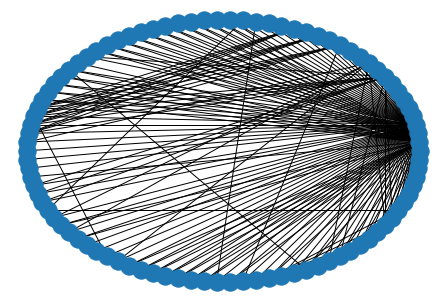

In [41]:
# Build the graph from the edge list
G = nx.from_edgelist(edge_list)

# Number of nodes
N_G = G.number_of_nodes()
print('The number of nodes in the graph is ' + str(N_G) + '.')

# Circular plot
nx.draw_circular(G) 

In [42]:
# Is the graph connected?
print(nx.is_connected(G))

True


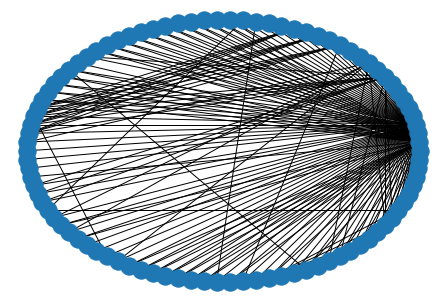

In [43]:
# Remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))

# Plot the resulting graph
nx.draw_circular(G) 

## Local topological similarity indices 

In [44]:
import pandas as pd
def compute_top_indices(graph, pairs, indices=['CN', 'JI', 'PA', 'AA', 'RA']):
    indices_functions = {
        'CN': nx.common_neighbors,
        'JI': nx.jaccard_coefficient,
        'PA': nx.preferential_attachment,
        'AA': nx.adamic_adar_index,
        'RA': nx.resource_allocation_index
    }
    global data
    data = {}
    for index_name in indices:
        if index_name == 'CN':
            data[index_name] = [len(list(indices_functions[index_name](graph, u, v))) for u, v in pairs]
        else:
            data[index_name] = [next(indices_functions[index_name](graph, [(u, v)]))[2] for u, v in pairs]
    return pd.DataFrame(data, index=pairs)

def top_indices(graph, indices=['CN', 'JI', 'PA', 'AA', 'RA']):
    graph_complement = nx.complement(graph)
    global pairs
    pairs = list(graph_complement.edges())
    df = compute_top_indices(graph, pairs, indices)
    df.index.name = 'Pair'
    return df

df1 = top_indices(G)

In [45]:
print(top_indices(G, indices=['CN', 'JI', 'PA', 'AA', 'RA']))

          CN        JI   PA        AA        RA
Pair                                           
(0, 1)     1  0.166667    6  0.222785  0.011236
(0, 2)     1  0.100000   30  0.222785  0.011236
(0, 48)    2  0.086957  114  0.485482  0.033458
(0, 57)    0  0.000000   12  0.000000  0.000000
(0, 62)    1  0.076923   48  0.222785  0.011236
...       ..       ...  ...       ...       ...
(76, 79)   1  0.500000    2  0.222785  0.011236
(76, 81)   1  0.500000    2  0.222785  0.011236
(78, 79)   1  0.500000    2  0.222785  0.011236
(78, 81)   1  0.500000    2  0.222785  0.011236
(79, 81)   1  1.000000    1  0.222785  0.011236

[4100 rows x 5 columns]


Now, we need to compute the link likelihood scores. The first five link likelihood scores coincide with the five topological indices. To build the sixth one, we need to scale each index separately between 0 and 1, and then average the indices.

In [46]:
scores = {}
if 'CN' in data:
    scores['CN_score'] = data['CN']
if 'JI' in data:
    scores['JI_score'] = data['JI']
if 'PA' in data:
    scores['PA_score'] = data['PA']
if 'AA' in data:
    scores['AA_score'] = data['AA']
if 'RA' in data:
    scores['RA_score'] = data['RA']
df = pd.DataFrame(data,index = pairs)

To scale each index, we can build a function min_max_scale() and apply it to each column of the DataFrame using transform().

In [47]:
#To scale each index, we can build a function min_max_scale() and apply it to each column of the DataFrame using transform().
def min_max_scale(data):
   return (data - np.min(data)) / (np.max(data) - np.min(data))
# Apply the function to the columns of the DataFrame
scaled_df = df.transform(min_max_scale, axis = 0) 
scaled_df.index.name = 'Pair'
print(scaled_df)
# Compute the mean over the columns
mean_score = scaled_df.aggregate(np.mean, axis = 1)

                CN        JI        PA        AA        RA
Pair                                                      
(0, 1)    0.333333  0.166667  0.010121  0.133766  0.021978
(0, 2)    0.333333  0.100000  0.058704  0.133766  0.021978
(0, 48)   0.666667  0.086957  0.228745  0.291497  0.065446
(0, 57)   0.000000  0.000000  0.022267  0.000000  0.000000
(0, 62)   0.333333  0.076923  0.095142  0.133766  0.021978
...            ...       ...       ...       ...       ...
(76, 79)  0.333333  0.500000  0.002024  0.133766  0.021978
(76, 81)  0.333333  0.500000  0.002024  0.133766  0.021978
(78, 79)  0.333333  0.500000  0.002024  0.133766  0.021978
(78, 81)  0.333333  0.500000  0.002024  0.133766  0.021978
(79, 81)  0.333333  1.000000  0.000000  0.133766  0.021978

[4100 rows x 5 columns]


Now we have to print the final score table adding to the last coloumn the mean_score value.

In [48]:
#Printing the final score table
#we now add the sixth likelihood score
similiarity_scores = pd.DataFrame(scores,index = pairs)
sim_scores_df = pd.concat([similiarity_scores, mean_score],axis = 1)
sim_scores_df.rename(columns = {0:'Mean_score'}, inplace = True)
sim_scores_df.index.name = 'Pair'
print(sim_scores_df)

          CN_score  JI_score  PA_score  AA_score  RA_score  Mean_score
Pair                                                                  
(0, 1)           1  0.166667         6  0.222785  0.011236    0.133173
(0, 2)           1  0.100000        30  0.222785  0.011236    0.129556
(0, 48)          2  0.086957       114  0.485482  0.033458    0.267862
(0, 57)          0  0.000000        12  0.000000  0.000000    0.004453
(0, 62)          1  0.076923        48  0.222785  0.011236    0.132228
...            ...       ...       ...       ...       ...         ...
(76, 79)         1  0.500000         2  0.222785  0.011236    0.198220
(76, 81)         1  0.500000         2  0.222785  0.011236    0.198220
(78, 79)         1  0.500000         2  0.222785  0.011236    0.198220
(78, 81)         1  0.500000         2  0.222785  0.011236    0.198220
(79, 81)         1  1.000000         1  0.222785  0.011236    0.297815

[4100 rows x 6 columns]


As a final step in our similarity-based approach, we need to rank each score and to pick the top 10 values.

In [49]:
ranked_df = sim_scores_df.rank(axis = 0, method = 'first',ascending =False)

We will now show the lists that contain the 'the top 10' missing links for each of the likelihood links.

In [50]:
CN_pred = ranked_df[ranked_df['CN_score'] <= 10].index.to_list()
JI_pred = ranked_df[ranked_df['JI_score'] <= 10].index.to_list()
PA_pred = ranked_df[ranked_df['PA_score'] <= 10].index.to_list()
AA_pred = ranked_df[ranked_df['AA_score'] <= 10].index.to_list()
RA_pred = ranked_df[ranked_df['RA_score'] <= 10].index.to_list()
Mean_pred = ranked_df[ranked_df['Mean_score'] <= 10].index.to_list()

print('For the Common Neighbour score the top 10 missing links are :', CN_pred)
print('For the Jaccard index score the top 10 missing links are :', JI_pred)
print('For the Preferential attachment index score the top 10 missing links are :', PA_pred)
print('For the Adamic-Adar index score the top 10 missing links are :', AA_pred)
print('For the Resource allocation index  score the top 10 missing links are :', RA_pred)
print('For the Mean score the top 10 missing links are :', Mean_pred)

For the Common Neighbour score the top 10 missing links are : [(41, 84), (2, 47), (48, 62), (48, 4), (48, 65), (48, 27), (48, 63), (3, 15), (3, 85), (3, 21)]
For the Jaccard index score the top 10 missing links are : [(1, 61), (1, 66), (1, 68), (1, 75), (1, 91), (1, 72), (1, 79), (1, 81), (16, 22), (16, 26)]
For the Preferential attachment index score the top 10 missing links are : [(41, 2), (41, 62), (41, 84), (41, 4), (41, 15), (41, 85), (41, 21), (41, 51), (41, 82), (41, 86)]
For the Adamic-Adar index score the top 10 missing links are : [(41, 84), (35, 38), (48, 62), (48, 4), (48, 65), (48, 27), (84, 4), (84, 65), (20, 64), (47, 64)]
For the Resource allocation index  score the top 10 missing links are : [(41, 84), (35, 57), (35, 11), (35, 38), (48, 62), (5, 38), (5, 69), (20, 69), (20, 64), (11, 71)]
For the Mean score the top 10 missing links are : [(41, 84), (35, 38), (2, 47), (48, 62), (5, 69), (20, 64), (11, 71), (63, 87), (63, 60), (47, 64)]


What we finally do, is understing if there is a missing link (tuple) that appears more time than the other missing links all sotred in the 6 lists.

We use a defaultdict from the collections module to count the number of times each tuple appears in the lists. The defaultdict is initialized with a default value of 0, so that when we increment the count for a tuple that has not yet been seen, it will automatically be initialized to 0 before being incremented. We then go through each list and count the number of times each tuple appears and eventually, we use the max function to find the tuple with the maximum count and print it along with its count.

In [51]:
from collections import defaultdict

# we create a dictionary to count the number of times each tuple appears
tuple_counts = defaultdict(int)

# we go through each list and count the tuples
for lst in [CN_pred, JI_pred, PA_pred, AA_pred, RA_pred, Mean_pred]:
    for missing_link in lst:
        tuple_counts[missing_link] += 1

# we then find the tuple with the maximum count
max_tuple = max(tuple_counts, key=tuple_counts.get)

# we eventually print the tuple with the maximum count
print(f'The tuple {max_tuple} occurs the most, with a count of {tuple_counts[max_tuple]}.')

The tuple (41, 84) occurs the most, with a count of 5.


# Week 9

In this week we have to create a random graph and compare it with our graph taking into account some characteristics like average clustering, degree distributions and so on.

In [52]:
# we import library
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

We decide to use the Erdős–Rényi model because our graph is pretty small and there are not huge hubs. In the Erdős-Rényi model, we start with a set of n nodes and connect them randomly with a fixed probability p. This means that each pair of nodes is independently connected with probability p, and the resulting graph is a random graph with n nodes and an average of p*n(n-1)/2 edges.

NetworkXError: random_state_index is incorrect

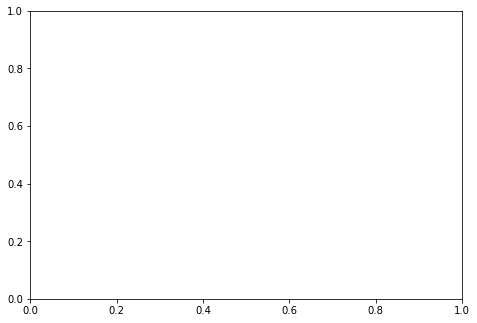

In [53]:
def create_erdosrenyi(vertex_num: int, probability: float):
    
    GE = nx.Graph()
    GE.add_nodes_from(range(vertex_num)) # Create the nodes

    for v1 in range(vertex_num): # pick one vertex
        for v2 in range(v1, vertex_num): # pick a second vertex (with index higher). 
            # Both loop allow to go over each pair by lexicographic order
            if v1 == v2:
                continue # don't add self edges
            if random.uniform(0, 1) <= probability: # draw a uniform rv between 0 and 1, if smaller than p then add the edge
                GE.add_edge(v1, v2,length=1)
    return GE
p = 0.05
GER = create_erdosrenyi(N, p)
nx.draw(GER,node_size=50)
plt.show()

Since in Erdős–Rényi p is the probability that a node has to create a link with an other node, choosing a number close to 1 would result in every actor being in a scene with the other actors with high probability. On the other hand, picking p close to 0 would result in low probability for an actor to be in at least one scene with the other actors. 
After a few trials, we found a p that made the random graph having similar characteristics to the original one.

We show the histogram of the degree of both the random graph and our "real" graph.

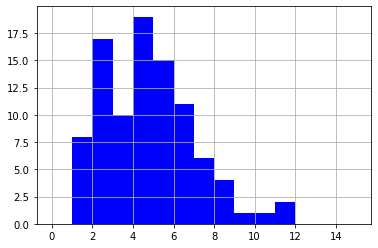

In [122]:
# random graph
data_degree=[GER.degree(n) for n in GER.nodes()] # List of degrees
pt = plt.hist(data_degree, bins=range(16),facecolor='blue')  #histogram of the date set data_centralities
plt.grid(True)
plt.show()

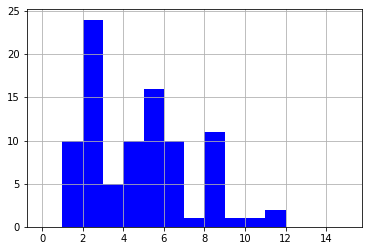

In [123]:
# original graph
data_degree=[G.degree(n) for n in G.nodes()] # List of degrees
pt = plt.hist(data_degree, bins=range(16),facecolor='blue')  #histogram of the date set data_centralities
plt.grid(True)
plt.show()

And there is the theoretical distribution.

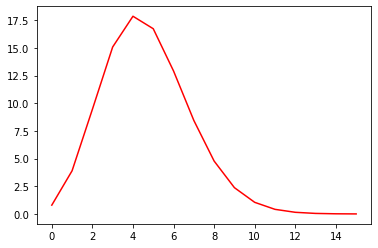

In [124]:
data_x=range(16)
data_y=[]

for k in data_x:
    y=scipy.stats.binom.pmf(k,N-1,p)
    data_y.append(N*y)

plt.plot(data_x,data_y,'r')

Using networkx built in functions we calculate some characteristics of both random and orginal graph and we compare them. 

In [125]:
# random graph first
L = GER.number_of_edges()
print(f'Edges of random graph: {L}\n')

N = GER.number_of_nodes()
print(f'Nodes of random graph: {N}\n')

average_degree = round(2*L / N,2)
print(f'Average Degree of random graph: {average_degree}\n')

density = round(average_degree / (N - 1),2)
print(f'Density of random graph: {density}\n')

Diameter = nx.diameter(GER)
print(f'Diameter of random graph: {Diameter}\n')

Average_Distance = nx.average_shortest_path_length(GER)
x = round(Average_Distance, 4)
print(f'Average Distance of random graph: {x}\n')

Edges of random graph: 202

Nodes of random graph: 94

Average Degree of random graph: 4.3

Density of random graph: 0.05

Diameter of random graph: 7

Average Distance of random graph: 3.2155



In [126]:
# and then the orginal graph
L = G.number_of_edges()
print(f'Edges of original graph: {L}\n')

N = G.number_of_nodes()
print(f'Nodes of original graph: {N}\n')

average_degree = round(2*L / N,2)
print(f'Average Degree of original graph: {average_degree}\n')

density = round(average_degree / (N - 1),2)
print(f'Density of original graph: {density}\n')

Diameter = nx.diameter(G)
print(f'Diameter of original graph: {Diameter}\n')

Average_Distance = nx.average_shortest_path_length(G)
x = round(Average_Distance, 4)
print(f'Average Distance of original graph: {x}\n')

Edges of original graph: 271

Nodes of original graph: 94

Average Degree of original graph: 5.77

Density of original graph: 0.06

Diameter of original graph: 4

Average Distance of original graph: 1.995



Conclusion: the results are very similar overall, hence we can conclude that our random graph approximation is working well so the model is quite good.

# WEEK 10

When trying to simulate the dynamics of propagation in a network of characters in a film, where nodes are linked if the actors appear in the same scene, the best model to use will likely be one that is specifically designed to model the spread of influence or popularity in a network. Some potential options could include the threshold model, the independent cascade model, or the Bass contagion model.


We decide to use Asynchronous Threshold Model because in the context of a film, this could be useful for analyzing the way that a plot point or rumor spreads among the characters. Because the model is asynchronous, it can capture the fact that different characters may receive and respond to the information at different times, depending on their individual interactions with each other. This can help to provide a more realistic representation of how information might spread in a real-world social network. Additionally, the threshold aspect of the model allows for the simulation of individual characters' decision-making processes, such as whether or not to believe the information or pass it on to others. This can provide valuable insight into the factors that influence the spread of information in a social network.


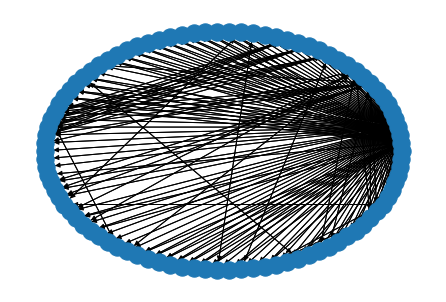

In [127]:
dirG = G.to_directed() #convert the graph into a directed one
nx.draw_circular(dirG)

In [128]:
#let's randomize the sample
I = random.sample(dirG.nodes(), 5)

In [129]:
def plot_async_threshold(Graph, threshold, initial_outbreak, time_limit):
    hearing_factor = 2
    node_list = list(Graph.nodes())
    random.shuffle(node_list)

    for node in Graph.nodes():
        Graph.nodes[node]['Status'] = 'Inactive'

    for node in initial_outbreak:
        Graph.nodes[node]['Status'] = 'Active'

    color_map = {'Inactive': 'grey', 'Active': 'r'}
    print("This is the initial configuration of our graph:")
    nx.draw_kamada_kawai(Graph, node_size=180, with_labels=False, node_color=[color_map[Graph.nodes[node]['Status']] for node in Graph.nodes()])
    plt.show()

    time = 1
    while time <= time_limit:
        random_activation = 0
        for node in node_list:
            if node not in initial_outbreak:
                active_neighbors = 0
                for neighbor in Graph.neighbors(node):
                    if Graph.nodes[neighbor]['Status'] == 'Active':
                        active_neighbors += 1
                if active_neighbors / len(list(Graph.neighbors(node))) > threshold:
                    Graph.nodes[node]['Status'] = 'Active'
        for node in Graph.nodes():
            rand_node = random.randint(0, 93)
            if rand_node < hearing_factor:
                if Graph.nodes[node]['Status'] == 'Inactive':
                    Graph.nodes[node]['Status'] == 'Active'
                    random_activation += 1

        active_nodes = 0
        for node in Graph.nodes():
            if Graph.nodes[node]['Status'] == 'Active':
                active_nodes += 1
        
        print(f"This is the configuration of our graph at iteration number {str(time)}")
        nx.draw_kamada_kawai(Graph, node_size=180, with_labels=False, node_color=[color_map[Graph.nodes[node]['Status']] for node in Graph.nodes()])
        print(f"The current number of active nodes is {active_nodes}")
        plt.show()

        time += 1
        print(f"At this iteration {random_activation} nodes become activated by the hearing factor")

    print(f"This is the final state of our graph at iteration number {str(time - 1):}")

    active_nodes = 0
    for node in Graph.nodes():
        if Graph.nodes[node]['Status'] == 'Active':
            active_nodes += 1
    if active_nodes == num_nodes:
        return "All the nodes are activated"
    else:
        return f"Out of all the nodes, {num_nodes - active_nodes} did not become active."


Comment of the code above:
It takes a Graph object representing the graph, a list of initial active nodes (initial_outbreak), a threshold value, and a time_limit as input parameters.

The code first initializes the status of all nodes to "Inactive" and then sets the status of the initial active nodes to "Active". It then plots the initial configuration of the graph using the nx.draw_kamada_kawai function from the networkx library.

Next, the code enters a loop that runs for a certain number of timesteps, specified by the time_limit parameter. In each timestep, the code first checks the neighbors of each inactive node to see if the fraction of active neighbors is greater than the specified threshold. If so, the node becomes active. Then, the code randomly activates a certain number of inactive nodes, using the hearing_factor parameter to control how many nodes become active.

After each timestep, the code plots the current configuration of the graph and prints the number of active nodes. It also prints the number of nodes that became active due to the random activation.

At the end of the loop, the code prints the final configuration of the graph and returns a message indicating whether all nodes became active or not.

This is the initial configuration of our graph:


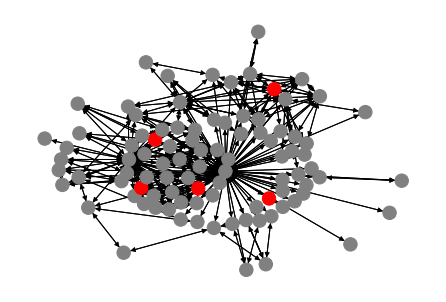

This is the configuration of our graph at iteration number 1
The current number of active nodes is 35


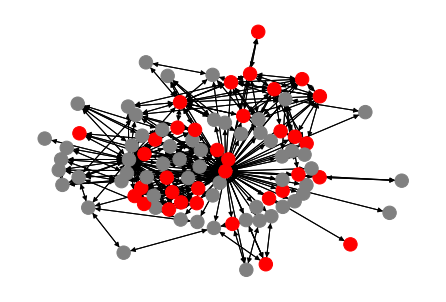

At this iteration 3 nodes become activated by the hearing factor
This is the configuration of our graph at iteration number 2
The current number of active nodes is 93


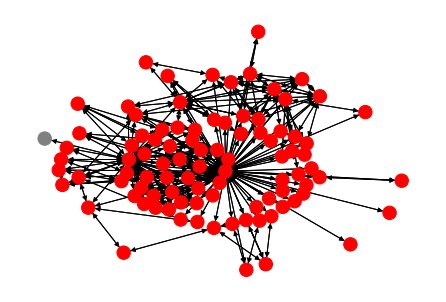

At this iteration 0 nodes become activated by the hearing factor
This is the configuration of our graph at iteration number 3
The current number of active nodes is 94


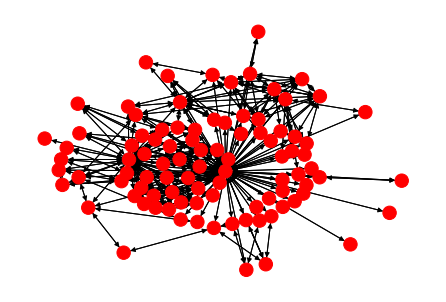

At this iteration 0 nodes become activated by the hearing factor
This is the final state of our graph at iteration number 3


'All the nodes are activated'

In [130]:
#let's insert some values, starting with a pretty low threshold
plot_async_threshold(dirG, 1/7, I, 3) 

We can clearly see that if we recall the function with an higher threshold there will be less nodes activated.

This is the initial configuration of our graph:


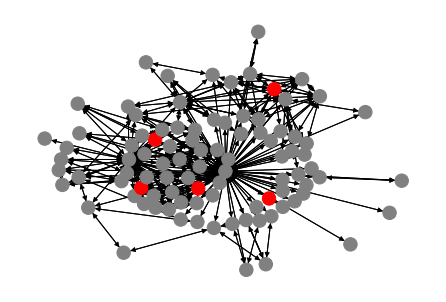

This is the configuration of our graph at iteration number 1
The current number of active nodes is 5


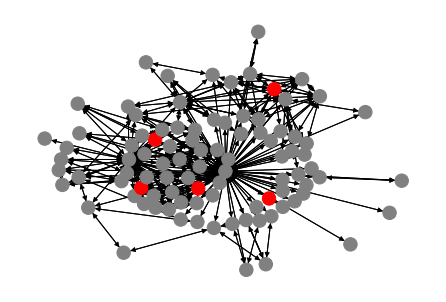

At this iteration 1 nodes become activated by the hearing factor
This is the configuration of our graph at iteration number 2
The current number of active nodes is 5


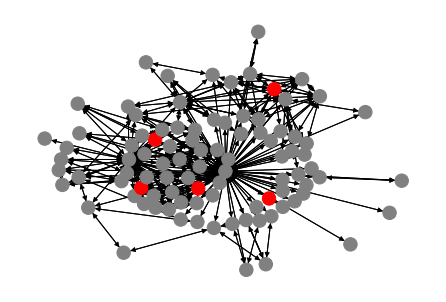

At this iteration 1 nodes become activated by the hearing factor
This is the configuration of our graph at iteration number 3
The current number of active nodes is 5


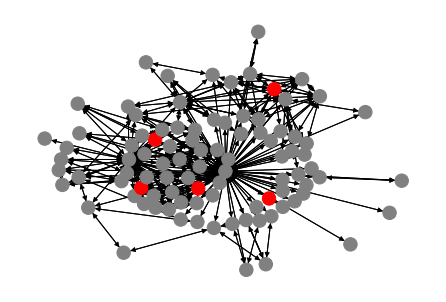

At this iteration 3 nodes become activated by the hearing factor
This is the final state of our graph at iteration number 3


'Out of all the nodes, 89 did not become active.'

In [131]:
plot_async_threshold(dirG, 1/4, I, 3)

Then, we design another function that check the contagion process for every initial node contaminated and create a list with the results.

In [132]:
def async_threshold(graph, initial_outbreak, threshold, time_limit):
    hearing_factor = 2
    node_list = list(graph.nodes())
    random.shuffle(node_list)

    for node in graph.nodes():
        graph.nodes[node]['Status'] = 'Inactive'

    for node in initial_outbreak:
        graph.nodes[node]['Status'] = 'Active'

    time = 1
    while time <= time_limit:
        for node in node_list:
            if node not in initial_outbreak:
                active_neighbors = 0
                for neighbor in graph.neighbors(node):
                    if graph.nodes[neighbor]['Status'] == 'Active':
                        active_neighbors += 1
                if active_neighbors / len(list(graph.neighbors(node))) > threshold:
                    graph.nodes[node]['Status'] = 'Active'
        time += 1

    random_activation = 0
    for node in graph.nodes():
        rand_node = random.randint(0, 93)
        if rand_node < hearing_factor:
            if graph.nodes[node]['Status'] == 'Inactive':
                graph.nodes[node]['Status'] = 'Active'
                random_activation += 1

    active_nodes = 0
    for node in graph.nodes():
        if graph.nodes[node]['Status'] == 'Active':
            active_nodes += 1

    return active_nodes

Comment of the code above
The graph parameter is an object representing a graph, where each node has an "Active" or "Inactive" status. The initial_outbreak parameter is a list of nodes that are initially active, simulating the initial infected individuals in the outbreak.

The threshold parameter is a value between 0 and 1, representing the fraction of a node's neighbors that must be active for the node to become active itself. This simulates the idea that a node (e.g. an individual) will become infected if a certain fraction of its neighbors (e.g. the individuals it comes into contact with) are already infected.

The code begins by setting the status of all nodes to "Inactive" and then setting the status of the nodes in the initial_outbreak list to "Active". Then, it runs a loop for a certain number of timesteps, specified by the time_limit parameter. In each timestep, the code checks the neighbors of each node to see if the fraction of active neighbors is greater than the specified threshold. If so, the node becomes active.

After the loop finishes, the code randomly activates a certain number of inactive nodes, simulating the idea that some individuals may become infected by chance even if a sufficient fraction of their neighbors are not already infected. Finally, the code counts the number of active nodes and returns this value as the result of the function.

In [133]:
def comparison_centrality_threshold_limit(graph, threshold, time_limit):
    data_y = []  # empty list where we will stock the number of nodes active for each starting outbreak

    for node in graph.nodes():
        y = async_threshold(graph, [node], threshold, time_limit)  # simulate from an outbreak at node "node"
        data_y.append(y)  # add the value to the list

    return data_y

Text(0, 0.5, 'Final infected nodes')

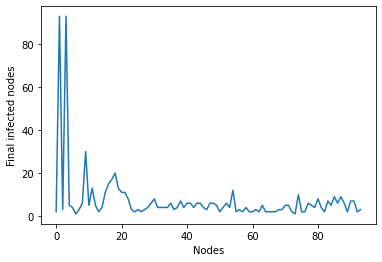

In [134]:
centrality_threshold = comparison_centrality_threshold_limit(dirG,1/6,2)
plt.plot(centrality_threshold)
plt.xlabel("Nodes")
plt.ylabel("Final infected nodes")

This plot really helps us to better understand the impact of nodes in terms of infection, indeed, some of them have an higher contagious rate

In [135]:
#Time to reach a given fraction f of the network

In [136]:
import random

def time_to_fract(Graph, initial_outbreak, threshold, fraction=float):
    hearing_factor = 2
    node_list = list(Graph.nodes())
    random.shuffle(node_list)

    # Set the initial outbreak nodes to be active
    for node in initial_outbreak:
        Graph.nodes[node]['Status'] = 'Active'

    # Set all other nodes to be inactive
    for node in Graph.nodes():
        if node not in initial_outbreak:
            Graph.nodes[node]['Status'] = 'Inactive'

    iteration = 0 
    active_fraction = 0
    num_nodes = Graph.number_of_nodes()

    # Iterate until the desired fraction is reached or the maximum number of iterations is reached
    while active_fraction <= fraction and iteration < 10000:
        iteration += 1

        # Apply the asynchronous update rule to each node
        for node in node_list:
            active_neighbors = 0
            for neigh in Graph.neighbors(node):
                if Graph.nodes[neigh]['Status'] == 'Active':
                    active_neighbors += 1
            if active_neighbors/len(list(Graph.neighbors(node))) > threshold:
                Graph.nodes[node]['Status'] = 'Active'

        # Apply the random activation rule to a subset of inactive nodes
        for node in Graph.nodes():
            if Graph.nodes[node]['Status'] == 'Inactive':
                rand_node = random.randint(1, 100)
                if rand_node < hearing_factor:
                    Graph.nodes[node]['Status'] = 'Active'

        # Calculate the fraction of active nodes in the network
        active_nodes = 0
        for node in Graph.nodes():
            if Graph.nodes[node]['Status'] == 'Active':
                active_nodes += 1
        active_fraction = active_nodes/num_nodes

    # Return the number of iterations needed to reach the desired fraction
    if active_fraction >= fraction:
        return f"The iterations needed to reach at least a fraction {fraction} of the graph is {iteration}."
    else:
        return "With this parameters the algorithm will never reach the fraction."



In [137]:
time_to_fract(dirG, I, 1/5, 15/21)

'The iterations needed to reach at least a fraction 0.7142857142857143 of the graph is 3.'

Let's try to set a lower threshold

In [138]:
time_to_fract(dirG, I, 1/7, 15/21)

'The iterations needed to reach at least a fraction 0.7142857142857143 of the graph is 2.'